# ANOVA

### testeo de mas de dos muestras

**ANOVA** = Análisis de la varianza, es una técnica que permite comparar tres o más medias de distintas muestras independientes.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3=\ldots=\mu_n$

$H1 :$ Al menos una es diferente

Los p_values se sacan con el F-test (F de Snedecor), comparando varianzas. Lo que se busca es una diferencia significativa en al menos uno de los grupos.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter('ignore')

##### F de Snedecor

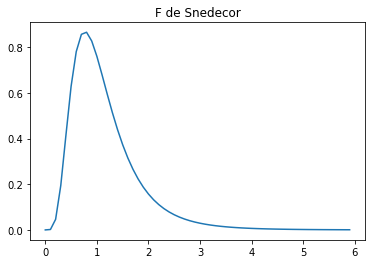

In [2]:
x=[i*.1 for i in range(60)]

plt.plot(x, f(15, 15).pdf(x))
plt.title('F de Snedecor');

##### F-test

In [3]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -3, 1) for x in x]
y2=[norm.pdf(x, 1, 2) for x in x]
y3=[norm.pdf(x, 4, 1.5) for x in x]

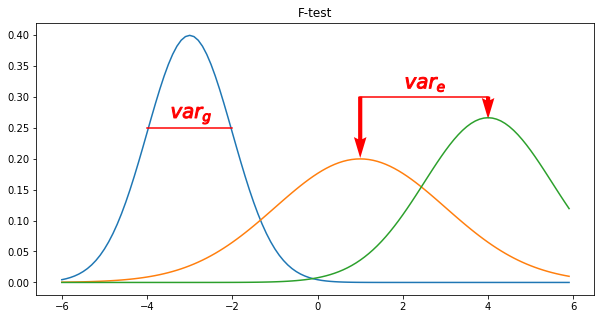

In [4]:
plt.figure(figsize=(10,5))

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.plot(-3, 0.27, marker='$var_g$', color='r', ms=40)
plt.plot(2.5, 0.32, marker='$var_e$', color='r', ms=40)

plt.plot([-4,-3,-2], [.25, .25, .25], color='r')
plt.plot([1,2,3,4], [.3, .3, .3, .3], color='r')

plt.quiver(1, 0.3, 0, -1.1, color='r', scale=10)
plt.quiver(4, 0.3, 0, -0.4, color='r', scale=10)

plt.title('F-test');

$F-test =$ Varianza entre los grupos / Varianza del grupo

$F-test = \frac{\sigma_e^2}{\sigma_g^2}$